EJERCICIO 1: FILTRO RUIDO PERIÓDICO IMAGEN 2D

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq, fft2, fftshift, ifft2, ifftshift

# 1) Almacene los datos de la imagen (use imread: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)

# 2) Use la librería de scipy de transformada de fourier en 2d y la trasnformada inversa
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html)
#para hacer un código que filtre el ruido periodico que tiene la imagen de la luna.

#3) haga una gráfica de la imagen filtrada y guárdela en LunaFiltrada.png

#imagen: https://blogs.3ds.com/simulia/wp-content/uploads/sites/18/2019/07/NASA_Moon.jpg


In [2]:
#1

name = "moon.jpg"
data = plt.imread(name)

data.shape

(700, 1200)

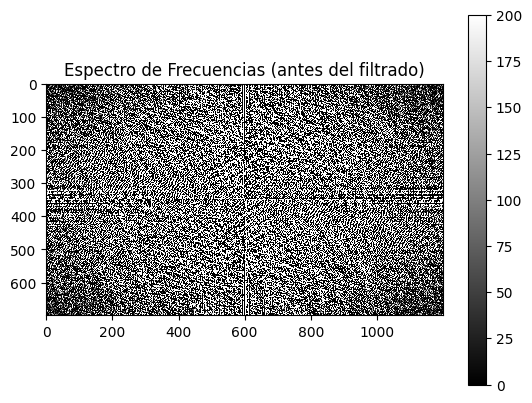

In [3]:
#2

ft = fft2(data)

ft_shifted = fftshift(ft)

plt.figure()
plt.imshow(np.real(ft_shifted), cmap="gray", vmin =0, vmax=200)
plt.title('Espectro de Frecuencias (antes del filtrado)')
plt.colorbar()

plt.show()

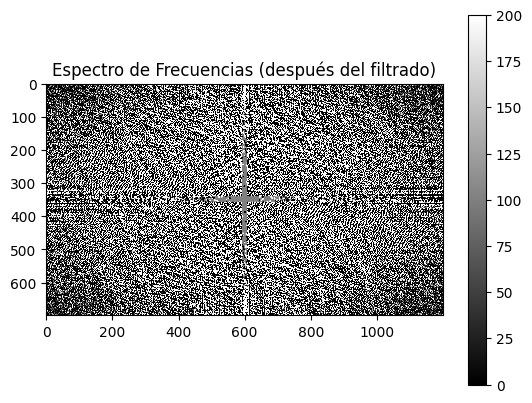

In [4]:
umbral = 10000

ft_shifted_filtered = ft_shifted.copy()

ft_shifted_filtered[340:360][np.abs(ft_shifted[340:360]) > umbral] = 100

ft_shifted_filtered[:,590:610][np.abs(ft_shifted[:,590:610]) > umbral] = 100


plt.figure()
plt.imshow(np.real(ft_shifted_filtered), cmap='gray', vmin =0, vmax=200)
plt.title('Espectro de Frecuencias (después del filtrado)')
plt.colorbar()
plt.show()


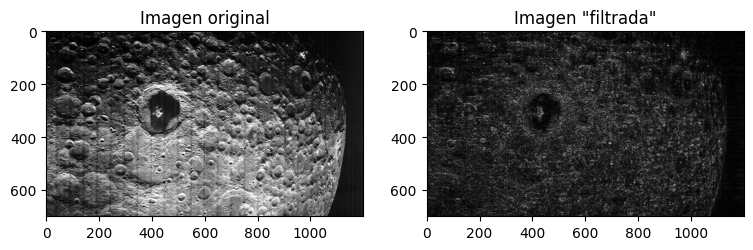

In [5]:
filtered = np.abs(ifft2(ifftshift(ft_shifted_filtered)))

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(data, cmap='gray')
axs[0].set_title('Imagen original')
axs[1].imshow(filtered, cmap='gray')
axs[1].set_title('Imagen "filtrada"')

plt.show()

EJERCICIO 2: FASE Y MAGNITUD

In [6]:
#Recupere la imagen original a partir de la fase y la amplitud de la transformada de fourier (archivos amplitude.dat y phase.dat).
#Recuerde que la transformada de fourier tiene una parte real y una imaginaria
#y recuerde tambien que un numero complejo se puede escribir a partir de la fase y la magnitud que son los datos que usted tiene
#(http://webpages.ursinus.edu/lriley/ref/complex/node1.html)


#1)Descargue los datos de fase y magnitud
#2) construya la transformada de fourier
#3) Obtenga la imagen haciendo la transformada inversa


In [7]:
#1

amp=np.genfromtxt("magnitude.dat", delimiter=' ')
phase=np.genfromtxt("phase.dat", delimiter=' ')


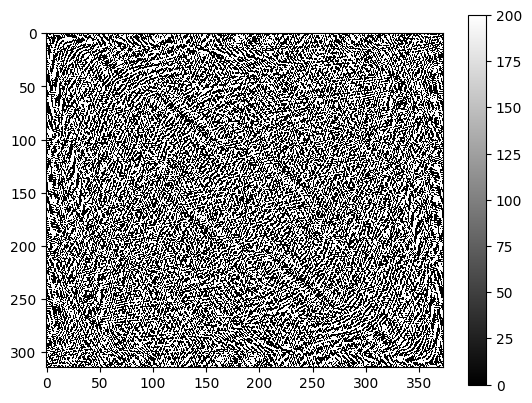

In [8]:
#2

fft_img = amp*np.exp(1j*phase)

plt.figure()
plt.imshow(np.real(fft_img), cmap='gray', vmin =0, vmax=200)
plt.colorbar()
plt.show()

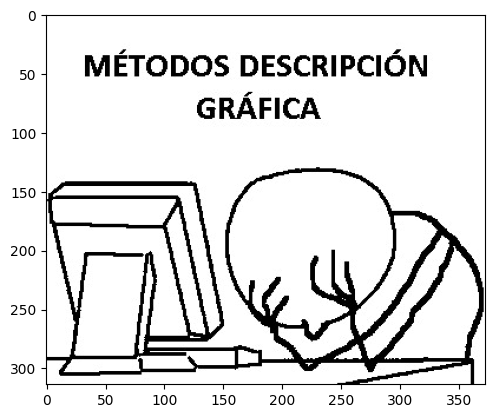

In [9]:
#3

ifft_img=np.real(ifft2(fft_img))

plt.imshow(ifft_img,cmap="gray")
plt.show()